In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir_logs = "./result_log/"
result_logs = [os.path.join(dir_logs, i) for i in os.listdir(dir_logs) if 'csv' in i]
result_logs

['./result_log/result_deeper.csv',
 './result_log/result_deeper+largebatch+bn.csv',
 './result_log/result_largebatch+deeeeeper.csv',
 './result_log/result_deeper+bn.csv',
 './result_log/result_largebatch+deeeeeeeeper.csv',
 './result_log/result_standard.csv',
 './result_log/result_largebatch.csv']

In [3]:
results = [pd.read_csv(i, index_col=0) for i in result_logs ]
results = pd.concat(results, axis=1)

condition_name = [re.split(string=os.path.basename(i), pattern="_|\\.")[1] for i in result_logs]
results.columns = condition_name
results.head()

,deeper,deeper+largebatch+bn,largebatch+deeeeeper,deeper+bn,largebatch+deeeeeeeeper,standard,largebatch
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0
2,0.0,-3.0,-2.0,0.0,-3.0,0.0,-3.0
3,0.0,1.0,-1.0,1.0,0.0,0.0,1.0
4,-2.0,0.0,0.0,-1.0,1.0,-2.0,0.0


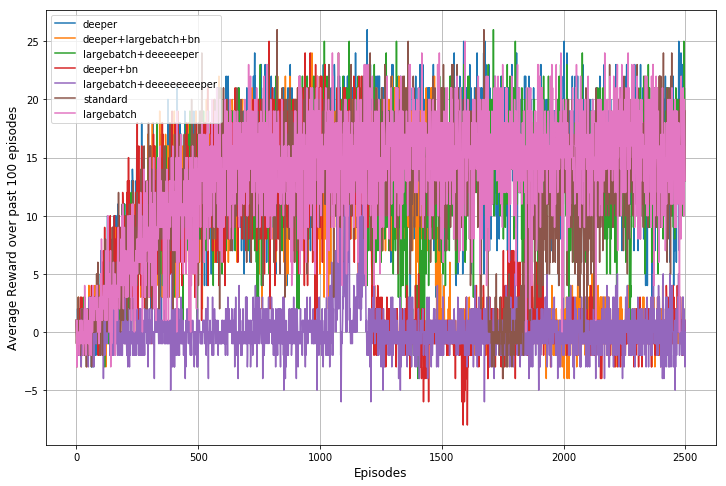

In [18]:
plt.figure(figsize=(12,8))
for i in condition_name:
    plt.plot(range(len(results)), results[i], label = i)

plt.grid()
plt.legend()
plt.xlabel('Episodes', fontsize = 12)
plt.ylabel('Average Reward over past 100 episodes', fontsize = 12)
plt.savefig("./img/plot_all.png")


In [5]:
def get_moving_mean(x, window_size = 100):
    moving_mean = []
    for i,value in enumerate(x):
        if i < window_size:
            window = x[:(i+1)]
        elif (i >= window_size) & (i <= (len(x)-window_size)):
            window = x[i:(i+window_size)]
        else:
            window = x[(i-window_size):]
        moving_mean.append(np.mean(window))
    return moving_mean

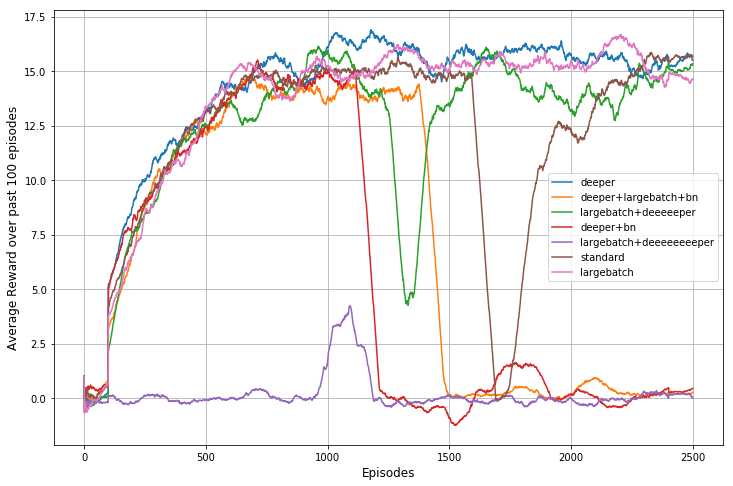

In [19]:
plt.figure(figsize=(12,8))
for i in condition_name:
    score_mov_avg = get_moving_mean(results[i])
    plt.plot(range(len(score_mov_avg)), score_mov_avg, label = i)

plt.grid()
plt.legend()
plt.xlabel('Episodes', fontsize = 12)
plt.ylabel('Average Reward over past 100 episodes', fontsize = 12)
plt.savefig("./img/plot_avg.png")


### Max reward

In [12]:
results.max(axis = 0)

deeper                     26.0
deeper+largebatch+bn       24.0
largebatch+deeeeeper       26.0
deeper+bn                  25.0
largebatch+deeeeeeeeper    14.0
standard                   26.0
largebatch                 25.0
dtype: float64

### Average over last 100 episodes

In [15]:
results.tail(100).mean(axis = 0)

deeper                     15.61
deeper+largebatch+bn        0.27
largebatch+deeeeeper       15.37
deeper+bn                   0.48
largebatch+deeeeeeeeper     0.04
standard                   15.44
largebatch                 14.62
dtype: float64